In [1]:
%reset -f
%reload_ext autoreload
%autoreload 2
%matplotlib inline
%config Completer.use_jedi = False

In [3]:
%reset -f
import sys
sys.path.insert(0,"..")
from tqdm import tqdm
# from tqdm.notebook import tqdm as tqdm
import numpy as np
import pandas as pd
import torch
torch.manual_seed(42)
import torch.nn as nn
import torch.optim as optim
import torchaudio
from torch.utils.data import Dataset, ConcatDataset
from torch.utils.data.sampler import SubsetRandomSampler
from torchvision import datasets, transforms
torchaudio.set_audio_backend('soundfile')
import os
import random
from pathlib import Path
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import psutil
import requests

from utils import *
from datasets import *
from models import *
from transforms import *
from profiler import *

Available workers: 16


In [82]:
wbprofiler = WingbeatDatasetProfiler(dsname='LG/LG_zapr_26_09')

In [83]:
wbprofiler.get_dataset_df();

  0%|          | 0/225 [00:00<?, ?it/s]

Found 7210 in dataset: LG/LG_zapr_26_09, and 1 label(s): ['LG_zapr_26_09']
Label(s) changed to [1]


226it [00:15, 14.52it/s]                         


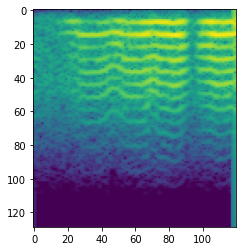

In [84]:
plt.imshow(wbprofiler.stfts[7200][0][0])

100%|██████████| 20/20 [00:00<00:00, 43.60it/s]


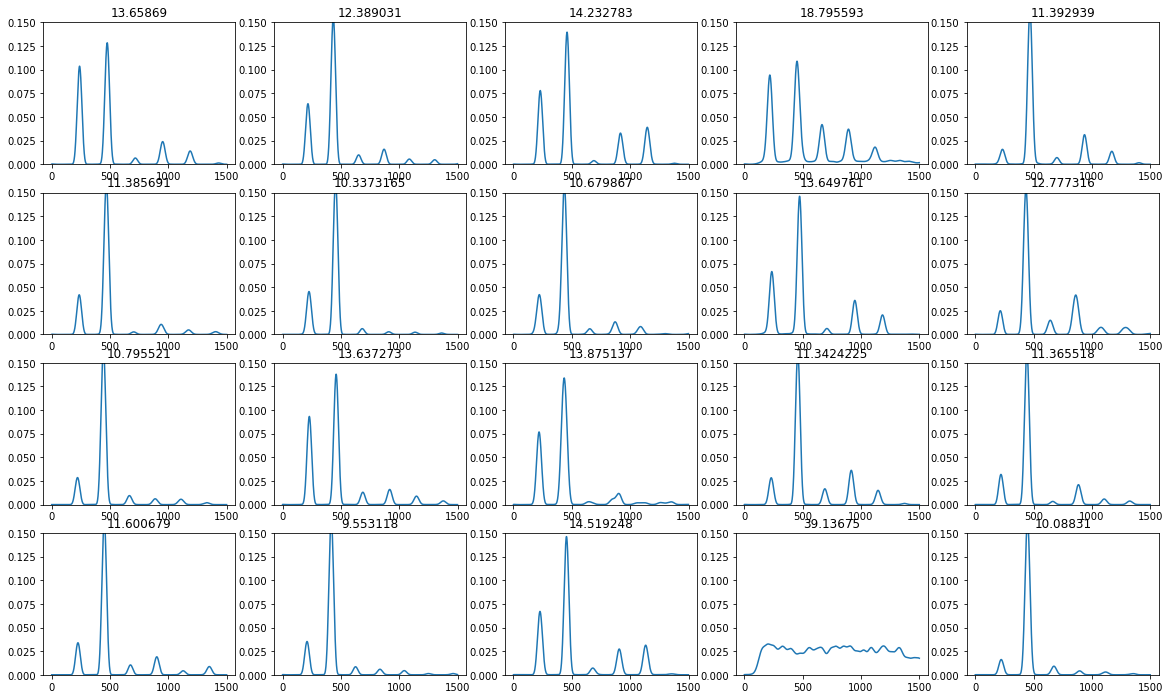

In [85]:
wbprofiler.plot_random_psds()

In [ ]:
wbprofiler.df.duration

In [2]:
window=250 
th=0.003

## Free

 20%|██        | 2/10 [00:00<00:00, 11.60it/s]

Found 299 in dataset: Flytrap_rpi/Backup_rpi_freeflight_20210328, and 1 label(s): ['Backup_rpi_freeflight_20210328']
Label(s) changed to [0]


100%|██████████| 10/10 [00:00<00:00, 15.50it/s]


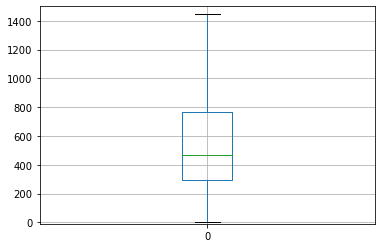

In [10]:
dfree = WingbeatsDataset(dsname="Flytrap_rpi/Backup_rpi_freeflight_20210328", custom_label=[0], clean=True)
freeloader = DataLoader(dfree, batch_size=32, pin_memory=True)
z = []
for x,y,p,idx,rate in tqdm(freeloader):
    z.extend([get_wbt_duration(i, window=window, th=th) for i in p])
pd.DataFrame(z).boxplot(showfliers=False); plt.ylim(-10,1500);

## Through

In [4]:
dthru = WingbeatsDataset(dsname="Flytrap_rpi/backup of flytrap rbpi data - pcfruit tests", custom_label=[0], clean=True)
thruloader = DataLoader(dthru, batch_size=32, pin_memory=True)
# z = []
# for x,y,p,idx,rate in tqdm(thruloader):
#     z.extend([get_wbt_duration(i, window=window, th=th) for i in p])
# pd.DataFrame(z).boxplot(showfliers=False); plt.ylim(-10,1500);

  0%|          | 0/2 [00:00<?, ?it/s]

Found 41 in dataset: Flytrap_rpi/backup of flytrap rbpi data - pcfruit tests, and 1 label(s): ['backup of flytrap rbpi data - pcfruit tests']
Label(s) changed to [0]


  0%|          | 0/2 [00:22<?, ?it/s]


NameError: name 'window' is not defined

In [5]:
dataset = WingbeatsDataset(dsname="Flytrap_rpi/backup of flytrap rbpi data - pcfruit tests", transform=transforms.Compose([Bandpass(), TransformWingbeat(setting='psdl2')]), clean=False, verbose=False)

In [16]:
dthru[0]

(tensor([[ 0.0022,  0.0014,  0.0046,  ..., -0.0005,  0.0029,  0.0020]]),
 0,
 '/home/kalfasyan/data/wingbeats/Flytrap_rpi/backup of flytrap rbpi data - pcfruit tests/20210413backup/110321/wingbeats/20210303_045740_Tna_Hna.wav',
 0,
 48000)

In [18]:
4000*18

72000